<a href="https://colab.research.google.com/github/AgrawalHimanshi/Data-Science/blob/PROJECTS/DominantColorExtraction_KMeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import numpy as np
import cv2
import matplotlib.pyplot as plt


In [19]:
from google.colab import files
uploaded = files.upload()

Saving Jamie_Before.jpg to Jamie_Before.jpg


In [34]:
img=cv2.imread('Jamie_Before.jpg')
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
original_shape=img.shape
print(img.shape)

(1024, 733, 3)


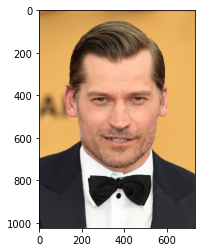

In [21]:
plt.imshow(img)

In [23]:
# flattening image
all_pixel=img.reshape((-1,3))
print(all_pixel.shape)

(750592, 3)


In [24]:
from sklearn.cluster import KMeans

In [25]:
dominant_color=4
kmeans=KMeans(n_clusters=dominant_color)
kmeans.fit(all_pixel)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [27]:
centers=kmeans.cluster_centers_

In [28]:
centers=np.array(centers,dtype='uint8')
print(centers)

[[164 117  85]
 [ 45  40  40]
 [232 174 111]
 [239 241 239]]


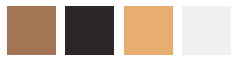

In [30]:
i=1
plt.figure(figsize=(4,2))
color=[]
for each_color in centers:
  plt.subplot(1,4,i)
  plt.axis('off')
  i+=1
  color.append(each_color)
  # color swatch
  a=np.zeros((100,100,3),dtype='uint8')
  # row,col,depth
  a[:,:,:]=each_color
  plt.imshow(a)

plt.show()

**Segmentinng original image** 

In [31]:
new_img=np.zeros((1024*733,3),dtype='uint8')

In [32]:
color

[array([164, 117,  85], dtype=uint8),
 array([45, 40, 40], dtype=uint8),
 array([232, 174, 111], dtype=uint8),
 array([239, 241, 239], dtype=uint8)]

In [33]:
kmeans.labels_

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

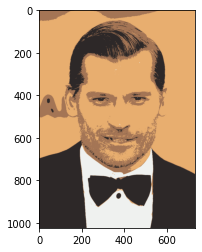

In [35]:
for ix in range(new_img.shape[0]):
  new_img[ix]=color[kmeans.labels_[ix]]

new_img=new_img.reshape((original_shape))
plt.imshow(new_img)
plt.show()